In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [5]:
ds = pd.read_csv("Social_Network_Ads.csv")

In [6]:
ds

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [8]:
ds.isnull().sum()

,0
Age,0
EstimatedSalary,0
Purchased,0


In [9]:
ds.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

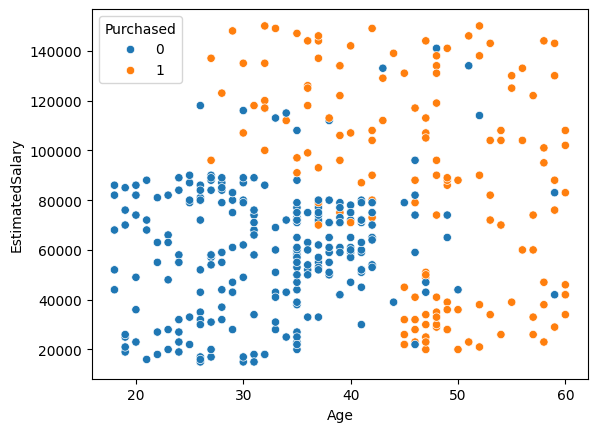

In [10]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=ds,hue='Purchased')

In [11]:
x=ds.iloc[:,:-1]
y=ds["Purchased"]

In [12]:
ss=StandardScaler()
ss.fit(x)
x=pd.DataFrame(ss.transform(x),columns=x.columns)

In [14]:
x.head(5)

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=90)

In [16]:
dtc=DecisionTreeClassifier()

In [17]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
dtc.score(x_test,y_test)*100

88.75

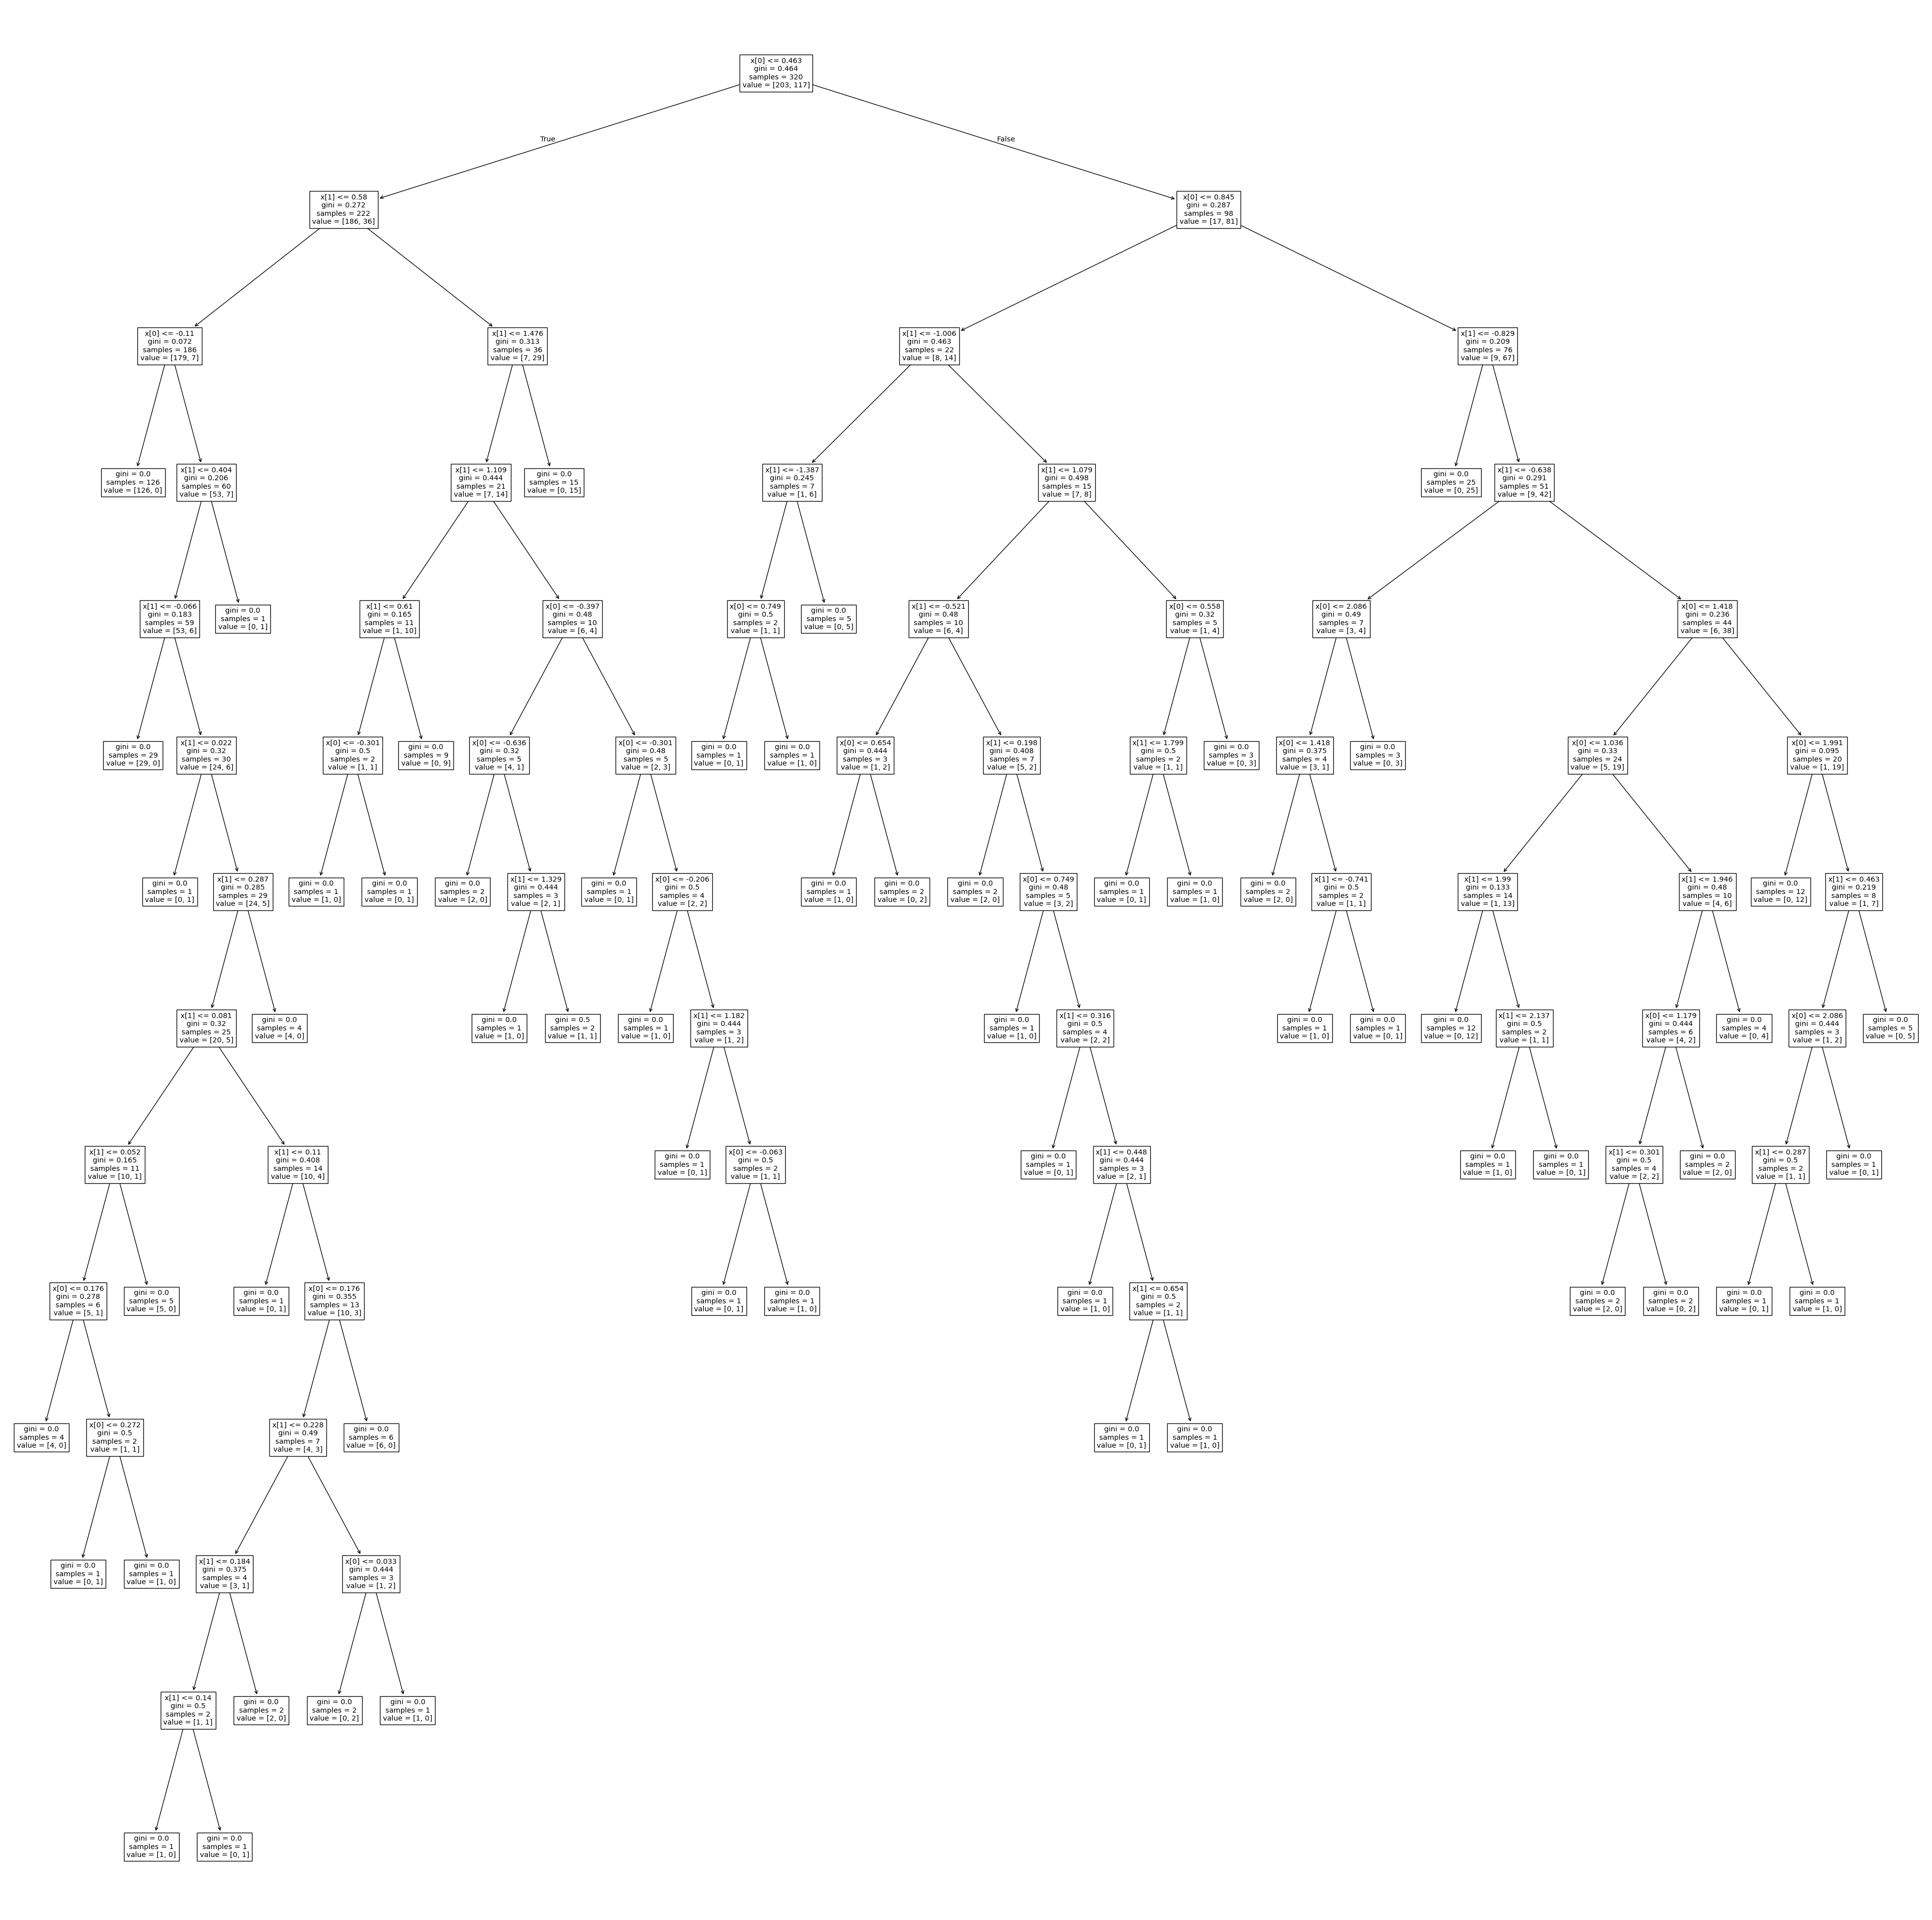

In [19]:
plt.figure(figsize=(50,50))
plot_tree(dtc)
plt.savefig("DTC.png")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

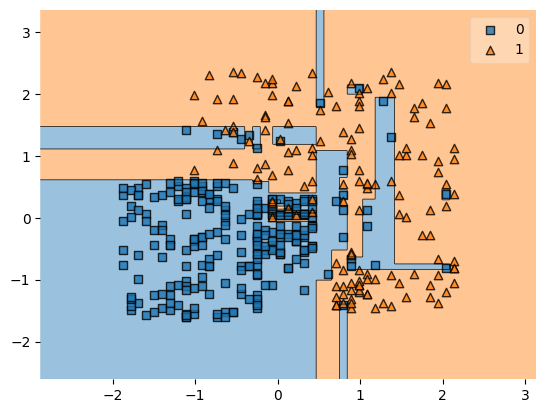

In [22]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dtc)